In [ ]:
print("Step 1: Downgrading NumPy to a stable version...")
!pip install "numpy<2.0"
print("\nStep 2: Uninstalling existing PyTorch versions...")
!pip uninstall -y torch torchvision torchaudio

print("\nStep 3: Installing compatible PyTorch, Torchvision, and Torchaudio...")
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
print("\nStep 4: Installing other project dependencies...")
!pip install -U datasets==2.15.0 pyarrow==14.0.1 transformers bitsandbytes accelerate pillow pandas matplotlib

print("\n✅ Setup complete. Please RESTART the session now.")


Step 1: Downgrading NumPy to a stable version...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 292.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.



Step 2: Uninstalling existing PyTorch versions...
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124

Step 3: Installing compatible PyTorch, Torchvision, and Torchaudio...
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.0 MB/s eta 0:00:00
     ━━━━━


✅ Setup complete. Please RESTART the session now.


In [ ]:
import sys
from google.colab import drive
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import logging


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PROJECT_PATH = '/content/drive/MyDrive/mats-spatial-reasoning'
sys.path.append(PROJECT_PATH)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/mats-spatial-reasoning

/content/drive/MyDrive/mats-spatial-reasoning


In [ ]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
from src.mats import auditor

In [ ]:
print("Loading LLaVA model...")
model_id = "llava-hf/llava-1.5-7b-hf"
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)
processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    device_map="auto"
)
print("✅ Model loaded successfully!")


Loading LLaVA model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

✅ Model loaded successfully!


In [ ]:
# Cell 4.5: Model Response Debugger
def debug_model_response(caption, image=None):
    """Test model response with a given caption"""
    if image is None:
        image = Image.new('RGB', (300, 300), (255, 255, 255))

    prompt = (
        "USER: <image>\nBased strictly on visual spatial relationships, "
        f"is this true or false? \"{caption}\" "
        "Answer only with 'True' or 'False'.\nASSISTANT:"
    )

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=15)

    response = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    return response.split("ASSISTANT:")[-1].strip()

# Test with simple spatial question
test_caption = "Is the red ball to the left of the blue box?"
print("Model response test:", debug_model_response(test_caption))

Model response test: True



Loading VSR dataset via auditor module...


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/5440 [00:00<?, ? examples/s]

ERROR:src.mats.auditor:Real load failed: An error occurred while generating the dataset


Loaded 2 high-quality VSR samples.

--- Sample Item from Loaded Dataset ---
Caption: A red ball is to the left of a blue box
Relation Type: left


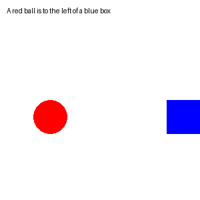

In [ ]:
# =============================================================
# Cell 5: Load the REAL VSR Dataset using your toolkit
# =============================================================

print("\nLoading VSR dataset via auditor module...")

# This one line now does all the work: loading, filtering, and image processing.
vsr_data = auditor.load_vsr_dataset(num_samples=100)

print(f"Loaded {len(vsr_data)} high-quality VSR samples.")

# Display a sample to confirm it loaded correctly
if vsr_data:
    print("\n--- Sample Item from Loaded Dataset ---")
    sample_item = vsr_data[0]
    print(f"Caption: {sample_item['caption']}")
    print(f"Relation Type: {sample_item.get('relation_type', 'unknown')}")

    # The 'image' key now holds a real PIL Image object, not a URL
    display(sample_item['image'].resize((200, 200)))
else:
    print("\n⚠️ Could not load real data. Please check logs.")

In [ ]:
# Cell 6: Run All Audits with Real Images - ENHANCED VERSION
# =============================================================
# Set the number of samples to test
NUM_SAMPLES = min(5, len(vsr_data))  # Use 5 or whatever is available
print(f"Starting all audits on {NUM_SAMPLES} real VSR samples...")

# --- Run the audits by calling functions from your toolkit ---
print("\n🚀 Running TEXT perturbation audit...")
text_results = auditor.run_text_perturbation_audit(model, processor, vsr_data[:NUM_SAMPLES])

print("\n🚀 Running VISUAL perturbation audit (Rotation)...")
visual_results = auditor.run_visual_perturbation_audit(model, processor, vsr_data[:NUM_SAMPLES])

print("\n🚀 Running COORDINATED perturbation audit (Flip + Text Swap)...")
coordinated_results = auditor.run_coordinated_perturbation_audit(model, processor, vsr_data[:NUM_SAMPLES])

# --- Convert results to DataFrames ---
text_df = pd.DataFrame(text_results)
visual_df = pd.DataFrame(visual_results)
coordinated_df = pd.DataFrame(coordinated_results)

# --- Analyze and Display Results ---
print("\n\n" + "="*80)
print("                       FINAL AUDIT ANALYSIS")
print("="*80)

# Create a helper function to display results neatly
def display_analysis(results_df, audit_name):
    print(f"\n--- {audit_name.upper()} AUDIT SUMMARY ---")

    # Generate summary statistics
    summary = auditor.generate_summary_table(results_df.to_dict('records'))

    # Display different columns based on audit type
    if audit_name == "Text Perturbation":
        display_cols = ['caption', 'perturbed_caption', 'orig_response', 'pert_response', 'consistency']
    elif audit_name == "Visual Perturbation (Rotation)":
        display_cols = ['caption', 'orig_response', 'rotated_response', 'consistency']
    elif audit_name == "Coordinated Perturbation (Flip)":
        display_cols = ['orig_caption', 'pert_caption', 'orig_response', 'pert_response', 'consistency']
    else:
        display_cols = results_df.columns.tolist()

    # Display the full results table
    display(results_df[display_cols])

    # Display the summary statistics
    print("\n📊 Summary Statistics:")
    print(f"  → Total Samples: {summary['total_samples']}")
    print(f"  → Consistent: {summary['consistent']} ({summary['consistency_rate']:.1%})")
    print(f"  → Inconsistent: {summary['inconsistent']}")
    print(f"  → Indeterminate: {summary['indeterminate']}")

    # Display failure modes
    if summary.get('failure_modes'):
        print("\n🔧 Failure Modes (by relation type):")
        for rel_type, count in summary['failure_modes'].items():
            print(f"  → {rel_type}: {count} failures")

# Call the display function for each set of results
display_analysis(text_df, "Text Perturbation")
display_analysis(visual_df, "Visual Perturbation (Rotation)")
display_analysis(coordinated_df, "Coordinated Perturbation (Flip)")

# Add overall SCS calculation
print("\n🔍 OVERALL SPATIAL CONSISTENCY SCORES")
print("="*50)
print(f"Text Perturbation SCS: {auditor.calculate_scs(text_results):.1%}")
print(f"Visual Perturbation SCS: {auditor.calculate_scs(visual_results):.1%}")
print(f"Coordinated Perturbation SCS: {auditor.calculate_scs(coordinated_results):.1%}")
print("="*50)

Starting all audits on 5 real VSR samples...

🚀 Running TEXT perturbation audit...


Text Perturbation Audit: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]



🚀 Running VISUAL perturbation audit (Rotation)...


Visual Perturbation Audit: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]



🚀 Running COORDINATED perturbation audit (Flip + Text Swap)...


Coordinated Perturbation Audit: 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]



                       FINAL AUDIT ANALYSIS

--- TEXT PERTURBATION AUDIT SUMMARY ---


,caption,perturbed_caption,orig_response,pert_response,consistency
0,a very typical bus station,a very typical bus station,True,True,CONSISTENT
1,sierra looked stunning in this top and this sk...,sierra looked stunning in this top and this sk...,True,True,CONSISTENT
2,NaN,NaN,NaN,NaN,NaN
3,interior design of modern living room with fir...,interior design of modern living room with fir...,True,True,CONSISTENT
4,cybernetic scene isolated on white background .,cybernetic scene isolated on white background .,True,True,CONSISTENT



📊 Summary Statistics:
  → Total Samples: 5
  → Consistent: 4 (80.0%)
  → Inconsistent: 0
  → Indeterminate: 0

--- VISUAL PERTURBATION (ROTATION) AUDIT SUMMARY ---


,caption,orig_response,rotated_response,consistency
0,a very typical bus station,True,True,CONSISTENT
1,sierra looked stunning in this top and this sk...,True,True,CONSISTENT
2,NaN,NaN,NaN,NaN
3,interior design of modern living room with fir...,True,True,CONSISTENT
4,cybernetic scene isolated on white background .,True,True,CONSISTENT



📊 Summary Statistics:
  → Total Samples: 5
  → Consistent: 4 (80.0%)
  → Inconsistent: 0
  → Indeterminate: 0

--- COORDINATED PERTURBATION (FLIP) AUDIT SUMMARY ---


,orig_caption,pert_caption,orig_response,pert_response,consistency
0,a very typical bus station,a very typical bus station,True,True,CONSISTENT
1,sierra looked stunning in this top and this sk...,sierra looked stunning in this top and this sk...,True,True,CONSISTENT
2,NaN,NaN,NaN,NaN,NaN
3,interior design of modern living room with fir...,interior design of modern living room with fir...,True,True,CONSISTENT
4,cybernetic scene isolated on white background .,cybernetic scene isolated on white background .,True,True,CONSISTENT



📊 Summary Statistics:
  → Total Samples: 5
  → Consistent: 4 (80.0%)
  → Inconsistent: 0
  → Indeterminate: 0

🔍 OVERALL SPATIAL CONSISTENCY SCORES
Text Perturbation SCS: 80.0%
Visual Perturbation SCS: 80.0%
Coordinated Perturbation SCS: 80.0%



Results Visualization


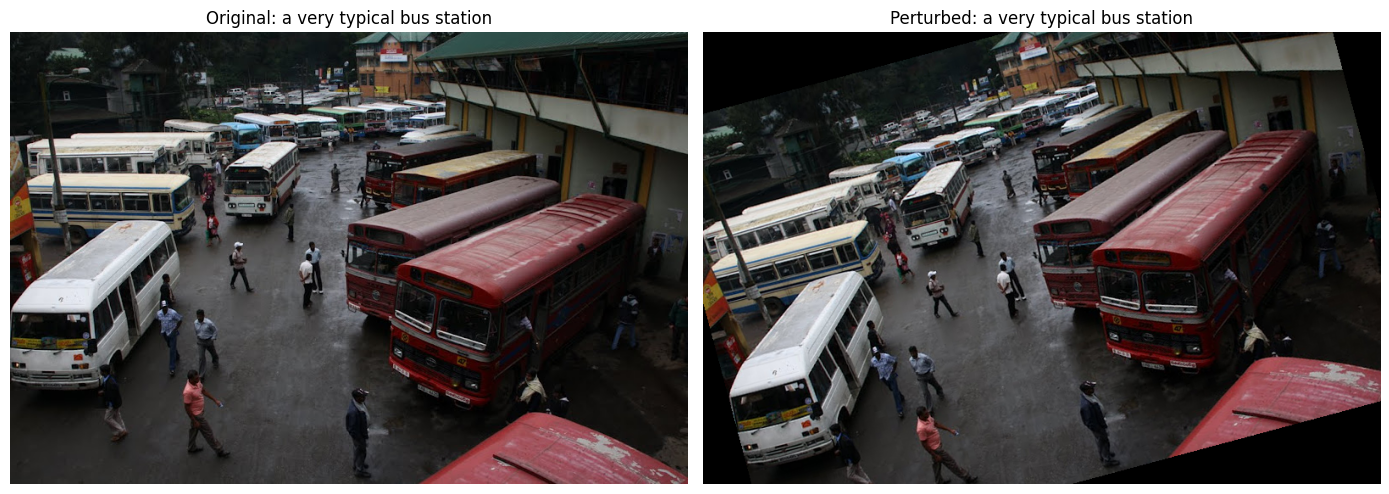

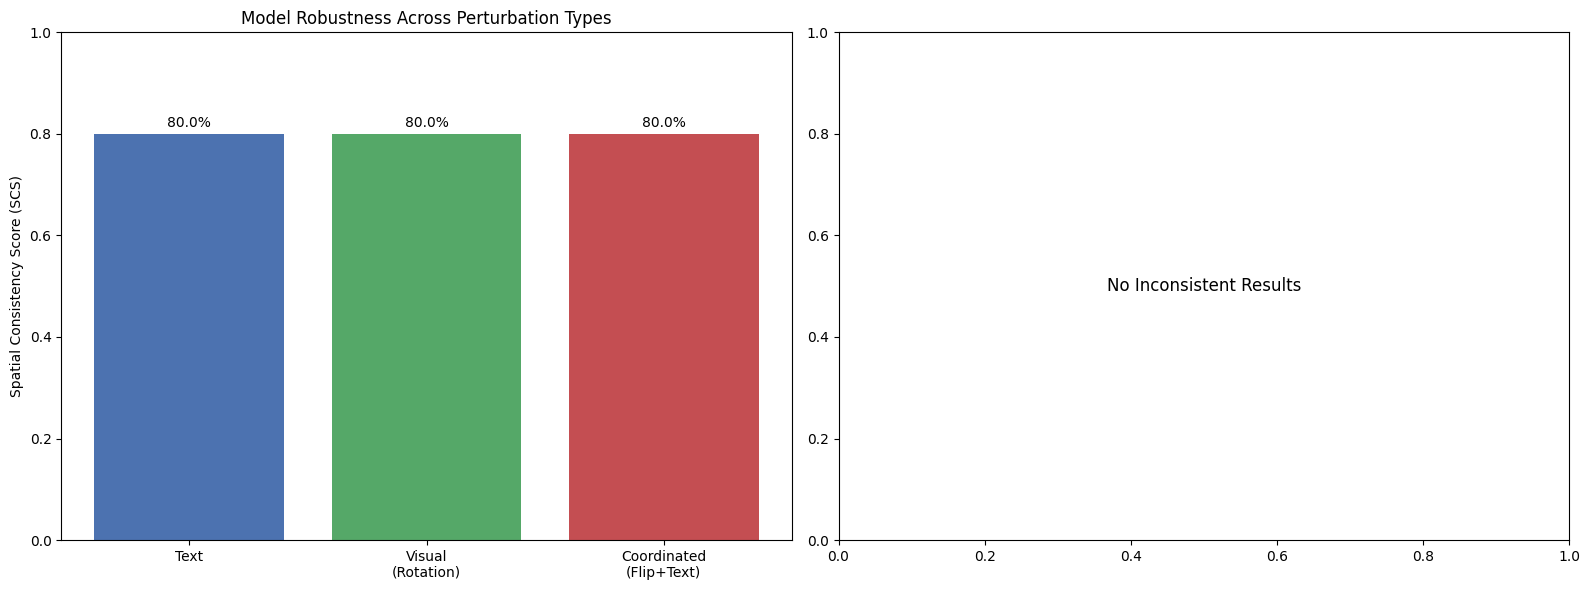


🖼️ Sample Visual Comparisons


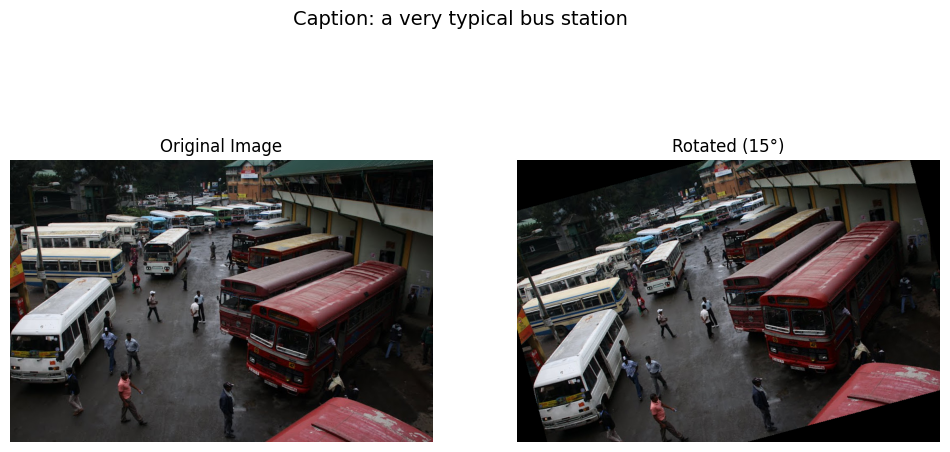


MATS Audit Complete!


In [ ]:
# Cell 7: Visualization - ENHANCED VERSION
# ----------------------------
print("\n" + "="*80)
print("Results Visualization")
print("="*80)


# Cell 7: Enhanced Visualization
def plot_side_by_side(orig_img, rotated_img, orig_caption, pert_caption):
    """Visual comparison with captions"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].imshow(orig_img)
    axes[0].set_title(f'Original: {orig_caption}', fontsize=12)
    axes[0].axis('off')

    axes[1].imshow(rotated_img)
    axes[1].set_title(f'Perturbed: {pert_caption}', fontsize=12)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Generate sample comparison
if len(vsr_data) > 0:
    sample = vsr_data[0]
    orig_img = auditor.ensure_pil_image(sample['image'])
    pert_caption = auditor.perturb_spatial_words(sample['caption'])

    plot_side_by_side(
        orig_img,
        auditor.rotate_image(orig_img, 15),
        sample['caption'],
        pert_caption
    )



def plot_results(text_df, visual_df, coordinated_df):
    """Plot comparative results with enhanced visuals"""
    # Prepare data
    audit_names = ['Text', 'Visual\n(Rotation)', 'Coordinated\n(Flip+Text)']
    scs_scores = [
        auditor.calculate_scs(text_df.to_dict('records')),
        auditor.calculate_scs(visual_df.to_dict('records')),
        auditor.calculate_scs(coordinated_df.to_dict('records'))
    ]

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot for SCS scores
    bars = ax1.bar(audit_names, scs_scores, color=['#4C72B0', '#55A868', '#C44E52'])
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Spatial Consistency Score (SCS)')
    ax1.set_title('Model Robustness Across Perturbation Types')

    # Add values on bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Failure mode analysis
    if not text_df.empty:
        failure_counts = text_df[text_df['consistency'] == 'INCONSISTENT']['relation_type'].value_counts()
        if not failure_counts.empty:
            failure_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
            ax2.set_ylabel('')
            ax2.set_title('Text Perturbation Failure Modes')
        else:
            ax2.text(0.5, 0.5, 'No Inconsistent Results',
                    ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()

# Generate plot
plot_results(text_df, visual_df, coordinated_df)

# Add sample image comparisons
print("\n🖼️ Sample Visual Comparisons")
sample_idx = 0 if len(vsr_data) > 0 else 0

if len(vsr_data) > sample_idx:
    orig_img = auditor.ensure_pil_image(vsr_data[sample_idx]['image'])
    rotated_img = auditor.rotate_image(orig_img, 15)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(orig_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(rotated_img)
    axes[1].set_title('Rotated (15°)')
    axes[1].axis('off')

    plt.suptitle(f"Caption: {vsr_data[sample_idx]['caption']}", fontsize=14)
    plt.show()

print("\n" + "="*80)
print("MATS Audit Complete!")
print("="*80)

In [ ]:
from datasets import load_dataset
dataset = load_dataset("juletxara/visual-spatial-reasoning", "random", split="train")
print(dataset)
print(dataset[0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7083 [00:00<?, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset